In [5]:
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
IMAGE_SIZE = 224

def redimensionarImagenes(listaRutaDeArchivos):
    listaDeImagenes = [] # array a retornar
    tf.reset_default_graph() # resetear gráfico computacional
    imagenOriginal = tf.placeholder(tf.float32, (None, None, None)) # declarar tensor para almacenar la imagen de entrada
    
    tf_img = tf.image.resize_images(imagenOriginal, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # Cambiar el tamaño de la imagen
    
    with tf.Session() as sess: # Iniciar la session de tensorflow
        sess.run(tf.global_variables_initializer()) # Iniciar las variables
        # Cada imagen se cambia de tamaño de forma individual ya que diferentes imágenes pueden ser de diferentes tamaños.
        
        for contador, rutaDeImagen in enumerate(listaRutaDeArchivos): # Recorrer la lista con un contador automático
            print("Imagen # "+str(contador+1)+"/"+str(len(listaRutaDeArchivos))+" : "+str(rutaDeImagen))
            
            # Usar Pseudocolor para mejorar el contraste de la imagen
            imagenDeEntrada = mpimg.imread(rutaDeImagen)[:, :, :3] 
            
            # almacena el valor del tensor tf_img seteado con el valor de la imagen con Pseudocolor agregado
            imagenConNuevoTamano = sess.run(tf_img, feed_dict = {imagenOriginal: imagenDeEntrada})
            #print('imagenDeEntrada({0[0]},{0[1]})'.format(imagenDeEntrada.shape))
            
            imagenReparada= np.multiply(imagenConNuevoTamano, 1.0 / 255.0)
            print('imagenReparada({0[0]},{0[1]})'.format(imagenReparada.shape))
            
            # Agregar al array a retornar cada imagen que se ha redimensionado
            listaDeImagenes.append(imagenReparada)
    listaDeImagenes = np.array(listaDeImagenes, dtype = np.float32) # Convert to numpy
    return listaDeImagenes

# Obtener imagenes
imgs_redimensionadas = redimensionarImagenes(['/notebooks/imagenes/frutas/manazana_1.jpg'])

Imagen # 1/1 : /notebooks/imagenes/frutas/manazana_1.jpg
imagenReparada(224,224)


In [6]:
from math import pi

def rotar_imagenes(imgs_redimensionadas, angulo_inicial, angulo_final, n_imagenes):
    listaImgRotadas = [] # array para almacenar la lista de imagenes rotadas a retornar
    iterar_en = (angulo_final - angulo_inicial) / (n_imagenes - 1) # obtener grados a rotar en cada iteración
    
    tf.reset_default_graph() # resetear el gráfico computacional
    
    #Tensor que almacena una imagen individual para agregar a la lista de imagenes rotadas a retornar
    img_item = tf.placeholder(tf.float32, shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3))
    
    # Tensor que almacena
    radian = tf.placeholder(tf.float32, shape = (len(imgs_redimensionadas)))
    tf_img = tf.contrib.image.rotate(img_item, radian) #rotar imagenes por angulos pasados en radianes
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) #Inicializar las variables
    
        for index in range(n_imagenes):
            grado_angulo = angulo_inicial + index * iterar_en # Obtener el angulo dinámicamente en cada iteración
            radianes = grado_angulo * pi / 180  # Convertir a radianes            
            radianArray = [radianes] * len(imgs_redimensionadas) # Obtener el array de radianes
            #print(str(radianArray))
            
            # almacenar los resultados de la de los tensores anteriores
            imgs_rotadas = sess.run(tf_img, feed_dict = {img_item: imgs_redimensionadas, radian: radianArray})
            
            listaImgRotadas.extend(imgs_rotadas) # agrega un elemento iterable a la lista 

    listaImgRotadas = np.array(listaImgRotadas, dtype = np.float32) # convertir la lista un array Numpy
    return listaImgRotadas
	
# La rotación comienza a -90 grados, termina a 90 grados y produce un total de 14 imágenes
resultado_rotacion = rotar_imagenes(imgs_redimensionadas, -90, 90, 14)
print(str(resultado_rotacion.shape))

(14, 224, 224, 3)


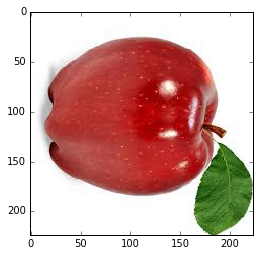

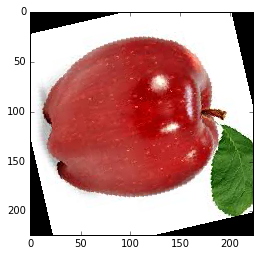

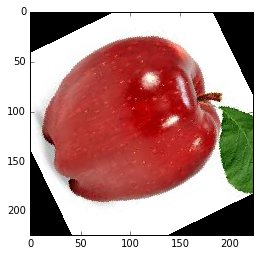

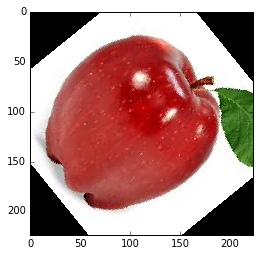

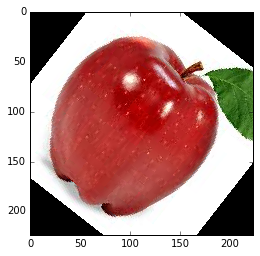

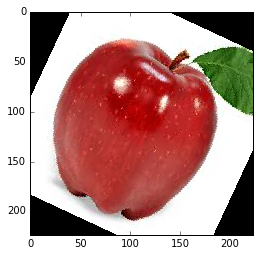

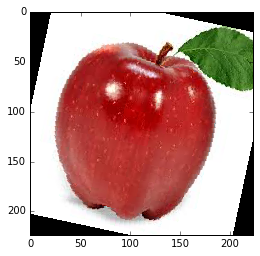

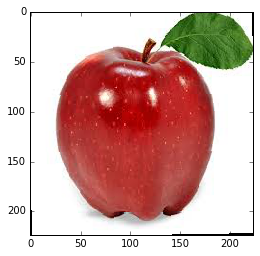

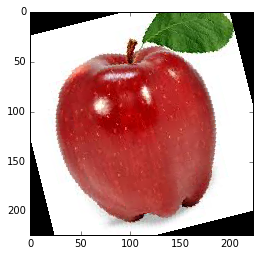

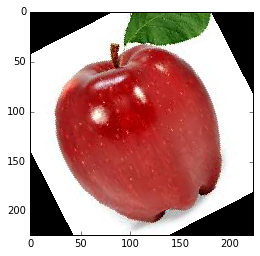

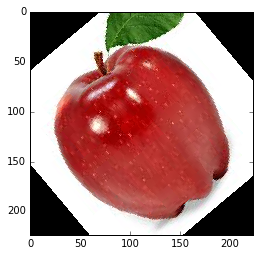

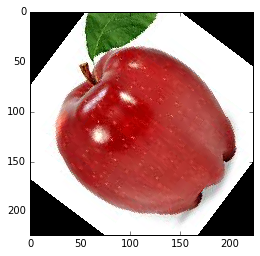

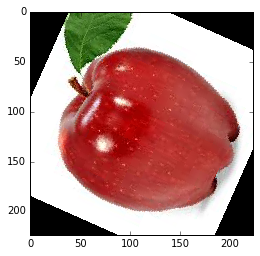

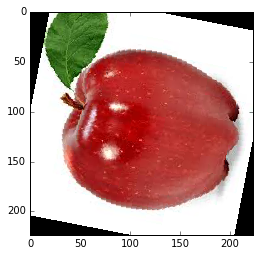

14


In [7]:
# Mostrar imagenes
"""print("Imagenes originales")
for imagen in imgs_redimensionadas:
    imgplot = plt.imshow(imagen)
    plt.show()
"""
i=0
#Iterar la lista y mostrar cada imagen
for imagen in resultado_rotacion:
    i=i+1
    imgplot = plt.imshow(imagen) #Renderizar una imagen a partir de una matriz de numpy
    plt.savefig('DESTINO/rotacion/MyNewImage'+str(i)+'.png')# guardar las imagenes generadas en una carpeta especifica
    plt.show()                   #Mostrar las imagenes
    
  
    
print(str(len(resultado_rotacion)))